### Thermodynamics of CO2 separation from air

What is the minimal energy needed to separate ideal gas #1 (CO2) from ideal gas #2 (air without CO2) [Ref 1]?

Ideal gas is defined such that there is no interaction between the particles in the system. That means that the in order to evaluate a change in free energy, we only have to account for the entropy of mixing distinguishable particles.

According to Boltzmann's formula relating number of microstates to entropy of system:

$\Delta_{mix}S = k_b ln \Omega$

The ideal gas that we want to investigate has effectively two species: $N_1$ molecules of CO2 and $N_2$ molecules that are not CO2. Combined, we say that $N = N_1 + N_2$. We group all non-CO2 molecules together because, as far as we're concerned, we can treat them identically. So we can then ask, what are the total number of ways we can label each molecule in the system using our two tags. Since we don't care about the order of particles, we get a combination expression:

$\Omega = N!/N_1!N_2!$

We're dealing with large systems ($N>10^{23}$) so $N!$ can be approximated using Sterling's formula: $N! = NlnN - N$

This gives:

$ln \Omega = (NlnN - N) - (N_1lnN_1 - N_1) - (N_2lnN_2 - N_2) = (N_1 + N_2)lnN - N_1lnN_1 - N_2lnN_2 $

$... = -(N_1lnN_1/N + N_2lnN_2/N) = -N(x_1 ln x_1 + x_2 ln x_2)  $

So plugging this back into the original mixing entropy expression:

$\Delta_{mix}S = - k_b N(x_1 ln x_1 + x_2 ln x_2) $


$\Delta_{mix}s = \Delta_{mix}S/n = - R(x_1 lnx_1 + x_2 lnx_2)$

Here, $x_1$ is the fraction of CO2 in air and $x_2$ is the fraction of non-CO2 molecules in air. R is the gas constant in units of J/K*mol. $\Delta_{mix}s$ is the change in entropy per mole of air.

In 2019, CO2 in air is at a concentration of 411 parts per million. Therefore, $x_1 = 411*10^{-6}$ particles of CO2 per particles of air and $x_2 = 0.999589$ particles of not CO2 air in air.

The change in free energy per mole of $CO_2$ ($\Delta g_{CO_2}$) is given by:

$\Delta g_{CO_2} = \frac{\Delta g_{air}}{x1} = \frac{-T\Delta_{mix}s}{x_1}$

We divide by $x_1$ because that's the ratio of moles of air needed to process per mole of $CO_2$.

So, taking CO2's molar mass as 44g/mol and finding the moles of air that contains 1Gt of CO2 (see below). The minimum energy required to separate 1kg of CO2 from air is $500 kJ$. But, it's easier to think about this number in different units:

kWh needed to concentrate 1 kg of CO2: **0.139 kWh/kg** [Ref 3]

GWy needed to concentrate 10 Gt of CO2: **0.159 GWy/10Gt**

The energy output of one power plant in the US ranges from ~$0.5-4GW$, meaning it could span the energy needed [Ref 2].

(See derivation below to find out how we got these numbers)

----

Now, if we want to convert the CO2 gas into liquid to transport it, we have to add, at least, the latent heat of converting CO2 gas into liquid. Looking up the CO2 vaporization energy gives: 574 kJ/kg [Ref 4] or 0.1594 kWh/kg. This is different than what MacKay finds (0.07 kWh/kg), but I don't know why [Ref 3].

----
Ref 1: https://en.wikipedia.org/wiki/Entropy_of_mixing#Statistical_thermodynamical_explanation_of_the_entropy_of_mixing_of_ideal_gases

Ref 2: EIA "How much electricity does a nuclear power plant generate?" - https://www.eia.gov/tools/faqs/faq.php?id=104&t=3

Ref 3: According to David MacKay, the thermodynamic limit of separating CO2 from air = 0.13 kWh/kg - https://www.withouthotair.com/c31/page_245.shtml - This is close to the value we get, especially considering CO2 ppm was lower when McKay wrote his book.

Ref 4: https://en.wikipedia.org/wiki/Latent_heat#Table_of_specific_latent_heats

In [2]:
%matplotlib inline 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x1 = 411 * 10**-6 #fraction of CO2 in air
x2 = 1-x1
T = 273 + 20 # Some normal surface temperature (K)

#Physical Constants
R = 8.3144598 #gas constant (J/mol/K)
Mco2 = 44 #molar mass of CO2 (g/mol)
Navo = 6.02*10**23
secs_in_year = (364*24*60*60)

In [4]:
-R*T*np.log(0.5)

1688.601299896959

In [5]:
ds = -R*(x1*np.log(x1) + x2*np.log(x2)) #Change in entropy per mole of air
dG = ds*T #Change in free energy per mole of air

In [6]:
moles_air_containing_1Gt_co2 = (10**15 / Mco2)/x1

In [7]:
E_min = dG*moles_air_containing_1Gt_co2 #Joules needed to separate CO2 from air
E_min_kwh_kg = E_min / 10**12 / (3.6 * 10**6)

In [8]:
print('Minimum kWh needed to concentrate kg of CO2:', E_min / 10**12 / (3.6 * 10**6), 'kWh/kg')
print('Minimum GWy needed to concentrate 10 Gt of CO2:', 10*E_min_kwh_kg * 10**12 / 10**9 / (24*365), 'GWy / 10Gt')
print('')
print('Minimum kJ needed to concentrate mol of CO2:', dG/x1/1e3, 'kJ/mol')

Minimum kWh needed to concentrate kg of CO2: 0.1352903578336313 kWh/kg
Minimum GWy needed to concentrate 10 Gt of CO2: 0.15444104775528686 GWy / 10Gt

Minimum kJ needed to concentrate mol of CO2: 21.4299926808472 kJ/mol


### Free energy as a function of CO2 fraction

In [11]:
x1_range = np.linspace(0.00028,1,1e6) #411 * 10**-6 #fraction of CO2 in air
#x1_range = np.logspace(-5,0,1e5)
x2_range = 1-x1_range
T = 273 + 20 # Some normal surface temperature (K)

ds_range = -R*(x1_range*np.log(x1_range) + x2_range*np.log(x2_range)) #Change in entropy per mole of air
dG_range = ds_range*T #Change in free energy per mole of air
moles_air_containing_1Gt_co2_range = (10**15 / Mco2)/x1_range
E_min_range = dG_range*moles_air_containing_1Gt_co2_range #Joules needed to separate CO2 from air
E_min_kj_mol_range = dG_range/x1_range/1e3 #(3.6*44)* E_min_range / 10**12 / (3.6 * 10**6)

C:\Users\trinb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


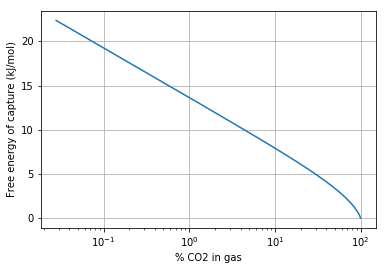

In [13]:
plt.plot(100*x1_range,E_min_kj_mol_range)
plt.plot([100*411 * 10**-6,100*411 * 10**-6], [np.min(E_min_kj_mol_range),np.max(E_min_kj_mol_range)],'r--')
plt.xlabel('% CO2 in gas')
plt.ylabel('Free energy of capture (kJ/mol)')
#plt.yscale('log')
plt.xscale('log')
plt.grid()

#### Lower bound on the area needed to use solar power to drive CO2-air separation?
- 1000 W/m2 of solar energy hitting the earth surface on a clear day (https://en.wikipedia.org/wiki/Solar_irradiance#Irradiance_on_Earth's_surface)
- Solar panel models vary by efficiency: 100 to 365 W/m2 (https://en.wikipedia.org/wiki/Solar_panel#Efficiencies)
- At the top of the atmopshere: 1361 W/m2

In [17]:
#Taking the lower bound of solar energy / area:
P_solar_panel = 100 #W/m2 - average power from solar panel per area
L_solar = np.sqrt(0.016e9/P_solar_panel) #GWy / 1Gt CO2 / (W/m2) -- see above for derivation

print('Area of solar cells needed with ', P_solar_panel , ' W/m2 of solar power generated: ', L_solar,'m X ',L_solar,'m')

Area of solar cells needed with  100  W/m2 of solar power generated:  400.0 m X  400.0 m
